# Introduction
Ahoy! Join us as we sail the high seas with [Seaborn](https://seaborn.pydata.org/introduction.html), a must-have library for any data scientist using Python for **statistical data visualization**.  This tutorial will use the Top 100 Beers of Canada dataset we developed in our last tutorial, [Merging Data]({% post_url 2017-05-16-merging-data %}).  With this limited (but fun!) dataset, we won't be doing any real statistical analysis, but we'll be doing something just as important: **data exploration**.  Data exploration is often the very first step after tidying a dataset, and the results from data exploration shape the subsequent data analysis.  We'll see what conclusions, if any, we can draw from the simple plots we'll introduce today.

## Contents
1. [Import Libraries](#1-import-libraries)
2. [Read Data](#2-read-data)
3. [Explore Data](#3-explore-data)
4. [Conclusion](#conclusion)

# 1. Import Libraries
Some notes on the following lines:
- The community has adopted the standard practice of importing *seaborn* as *sns*
- The magic command `%matplotlib inline` allows plots to show up in Jupyter notebooks
- Display options for both *pandas* and *seaborn* are set for aesthetic reasons

In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

# Global options
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")
sns.set_context('notebook', font_scale=1.2)

# 2. Read Data

In [2]:
filename = './data/top_100_canadian_beers_with_city.csv'
df = pd.read_csv(filename)

print(df.head())  # Peek at our dataset

   rank                                      name                  brewery                             style   abv  score  ratings          city          province
0     1                              Péché Mortel  Brasserie Dieu du Ciel!  American Double / Imperial Stout   9.5   4.39     5087  Saint-Jérôme            Quebec
1     2  Péché Mortel En Fût De Bourbon Américain  Brasserie Dieu du Ciel!  American Double / Imperial Stout   9.5   4.45      488  Saint-Jérôme            Quebec
2     3                           La Fin Du Monde                 Unibroue                            Tripel   9.0   4.31    10021       Chambly            Quebec
3     4                Unibroue 17 Grande Réserve                 Unibroue           Belgian Strong Dark Ale  10.0   4.24     1140       Chambly            Quebec
4     5                               Fat Tug IPA        Driftwood Brewery                      American IPA   7.0   4.25      601      Victoria  British Columbia


# 3. Explore Data
With a new dataset, the very first thing we often ask is are there any relationship between variables.  Based on your own experience and domain knowledge, you may intuitively assume some relationships exist, but it's important to validate/invalidate these intuitions as well as uncover any unknown relationships.

### pairplot
A quick method for uncovering pairwise relationships is `pairplot()`, which plots every numeric variable against each other in a grid format.

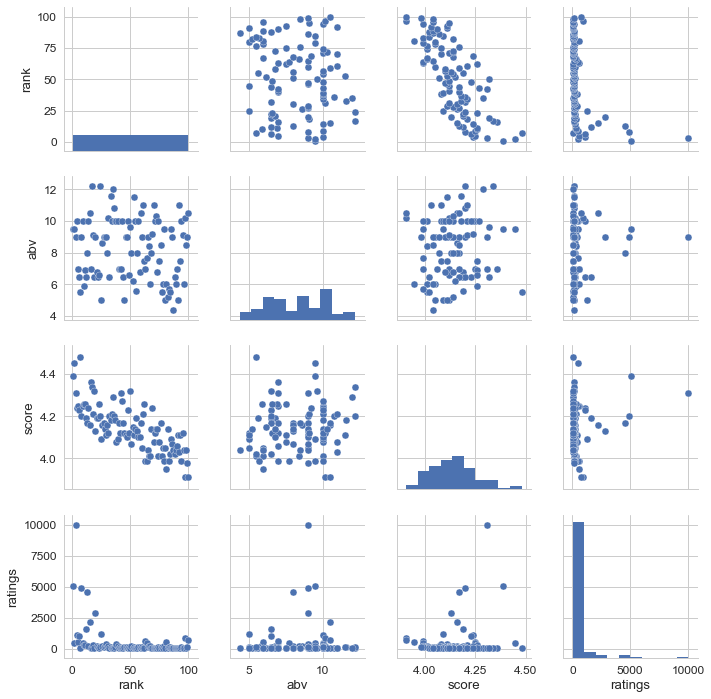

In [3]:
sns.pairplot(df);

Our dataset, with 4 numeric variables, creates a 4x4 grid.

Looking at the cells, the only plot that looks like it shows a relationship is *score* and *rank*.  It appears to have a **negative correlation**.  This makes sense, as generally the higher the score of a beer, the lower its rank (1 is the top ranked beer, 100 is the lowest ranked beer).  The reason it's not a perfectly linear relationship is due to how BeerAdvocate.com uses a weighted ranking method (read about it [here](https://www.beeradvocate.com/community/threads/beeradvocate-ratings-explained.184726/)).

All the other plots look fairly random, and that makes sense too.  For example, we don't expect a relationship between *ABV* and *score*.

The diagonals are different in that it shows the univariate distribution of the data for the variable in that column.  For example, the plot in the bottom right corner shows that the vast majority of beers have relatively few ratings.  In statistical terms, this is known as a very high **positive skew**.

> If you noticed the semicolon at the end of the line calling pairplot, this is just to suppress the output of an Jupyter cell.  The normal output of a call to *seaborn* is an object that displays as `<seaborn.axisgrid.PairGrid at 0xd925ba8>`, so for aesthetic reasons I hide this line
{:.blockquote}

### Correlation Heatmap
A related method for uncovering pairwise relationships is using *seaborn* to plot a heatmap of the correlation between variables.  The *pandas* method `.corr()` returns a matrix of the Pearson correlation coefficient (by default) for every variable pair, and `heatmap()` can plot the resulting correlation matrix.

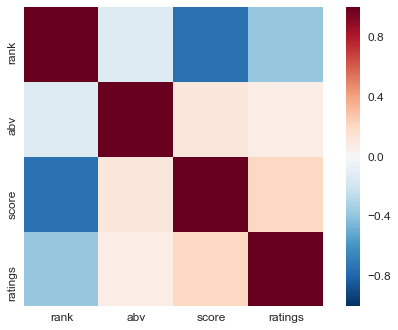

In [4]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, square=True);

Now we can quickly see the strong negative correlation between *score* and *rank*.

### lmplot
I'm curious to see if there is any relationship between a beer's style, ABV, and score.  `lmplot()` is normally used to plot regression models, but it can also be used to plot scatterplots without fitting a regression model:

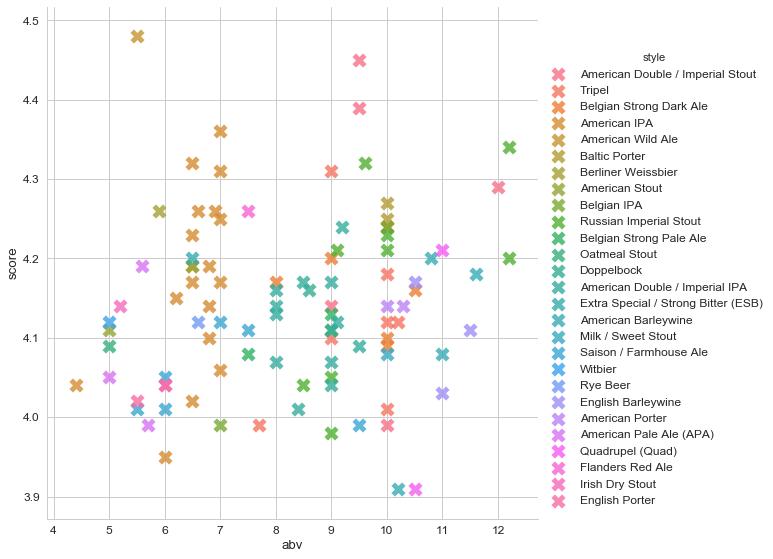

In [5]:
sns.lmplot(x='abv', y='score', hue='style', data=df, fit_reg=False, markers='X', size=8, scatter_kws={'alpha':0.8, 's':200});

Wow, very pretty, but hard to read (*sounds like some girls I know*).  There are just too many beer styles to easily draw any conclusions from this chart.  We'll implement a technique called **binning** to generalize the various beer styles into broader beer families.
> Some beer purists are going to flame me for what I'm about to do... remember, this is just an exercise in data visualization!
{:.blockquote}

### Binning
For numeric data, it is very easy to bin data using *pandas* `cut()` method.  For our text data, we'll have to do it manually:

In [6]:
beer_families = {
    'barleywine': ['American Barleywine', 'English Barleywine'],
    'belgian dark ales': ['Belgian Strong Dark Ale', 'Quadrupel (Quad)'],
    'IPA': ['American Double / Imperial IPA', 'American IPA', 'Belgian IPA'],
    'pale ale': ['American Pale Ale (APA)', 'Belgian Strong Pale Ale'],
    'porter/stout': ['American Porter', 'Baltic Porter', 'English Porter', 'American Double / Imperial Stout', 'American Stout', 'Irish Dry Stout', 'Milk / Sweet Stout', 'Oatmeal Stout', 'Russian Imperial Stout'],
    'saison': ['Saison / Farmhouse Ale'],
    'tripel': ['Tripel'],
    'wheat beer': ['Berliner Weissbier', 'Witbier'], 
    # Uncategorized
    # American Wild Ale
    # Doppelbock
    # Extra Special / Strong Bitter (ESB)
    # Flanders Red Ale
    # Rye Beer
}

def get_beer_family(style):
    family = [k for k, v in beer_families.items() if style in v]
    return next(iter(family), 'Other')
    
df['family'] = df['style'].apply(lambda x: get_beer_family(x))
print(df.head())

   rank                                      name                  brewery                             style   abv  score  ratings          city          province             family
0     1                              Péché Mortel  Brasserie Dieu du Ciel!  American Double / Imperial Stout   9.5   4.39     5087  Saint-Jérôme            Quebec       porter/stout
1     2  Péché Mortel En Fût De Bourbon Américain  Brasserie Dieu du Ciel!  American Double / Imperial Stout   9.5   4.45      488  Saint-Jérôme            Quebec       porter/stout
2     3                           La Fin Du Monde                 Unibroue                            Tripel   9.0   4.31    10021       Chambly            Quebec             tripel
3     4                Unibroue 17 Grande Réserve                 Unibroue           Belgian Strong Dark Ale  10.0   4.24     1140       Chambly            Quebec  belgian dark ales
4     5                               Fat Tug IPA        Driftwood Brewery                

In [7]:
print('Original number of beer styles: {}'.format(len(df['style'].unique())))
print('Number of beer families: {}'.format(len(df.family.unique())))
print(df.family.value_counts())

Original number of beer styles: 27
Number of beer families: 9
IPA                  33
porter/stout         27
belgian dark ales     8
tripel                7
barleywine            7
saison                6
pale ale              5
Other                 5
wheat beer            2
Name: family, dtype: int64


So we went from 27 unique beer styles to 8 beer families, plus 1 *other* category to catch all the rest.  Let's further reduce this by moving any beer that has 5 or less entries in the Top 100 list to the *other* category.

In [8]:
threshold = 5
df = df.apply(lambda x: x.mask(x.map(x.value_counts())<=threshold, 'other') if x.name=='family' else x)
print('Number of beer families: {}'.format(len(df.family.unique())))
print(df.family.value_counts())

Number of beer families: 7
IPA                  33
porter/stout         27
other                12
belgian dark ales     8
tripel                7
barleywine            7
saison                6
Name: family, dtype: int64


So now we have 6 beer families, plus the *other* category.  Just to remind ourselves what is in the *other* category:

In [9]:
print(df.loc[df['family'] == 'other']['style'].unique())

['American Wild Ale' 'Berliner Weissbier' 'Belgian Strong Pale Ale'
 'Doppelbock' 'Extra Special / Strong Bitter (ESB)' 'Witbier' 'Rye Beer'
 'American Pale Ale (APA)' 'Flanders Red Ale']


### *pandas* categorical data type

One last thing I'd like to do is convert the *family* variable into a Pandas `categorical` data type.  This is done for two reasons:
- The logical order of the family is not the same as the lexical order of the text.  In other words, I want the list sorted alphabetically, but I want the *other* category as the last item
- Signal to other Python libraries to treat this variable as a categorical.  For example, *seaborn* knows how to treat categorical variables when plotting

In [10]:
# create the category orders, sorted alphabetically
sorted_family_index = df.family.drop_duplicates().str.lower().sort_values().index
family_order = df.family.iloc[sorted_family_index]

# move 'other' to end of categories
family_order = family_order[family_order != 'other']
family_order = family_order.append(pd.Series('other'))

# cast as an ordered pandas categorical
df.family = df.family.astype('category', ordered=True, categories=family_order)

### Custom *seaborn* Color Palettes

One last thing before we plot our slimmed down data is to create a custom color palette.  Much as I like the rainbow-y pastels of the default *seaborn* palette, it can be somewhat hard to see with this many variables.  Also, I want the *other* category to be a neutral grey color.  After creating this palette, we can then use it in subsequent charts that use the *family* variable.

In [11]:
# Create custom color palette
family_palette = sns.color_palette('Set1', len(df.family.cat.categories)-1)
family_palette.append(sns.xkcd_rgb["grey"])  # 'other' category

# Set palette as default
sns.set_palette(family_palette)

### Binned lmplot

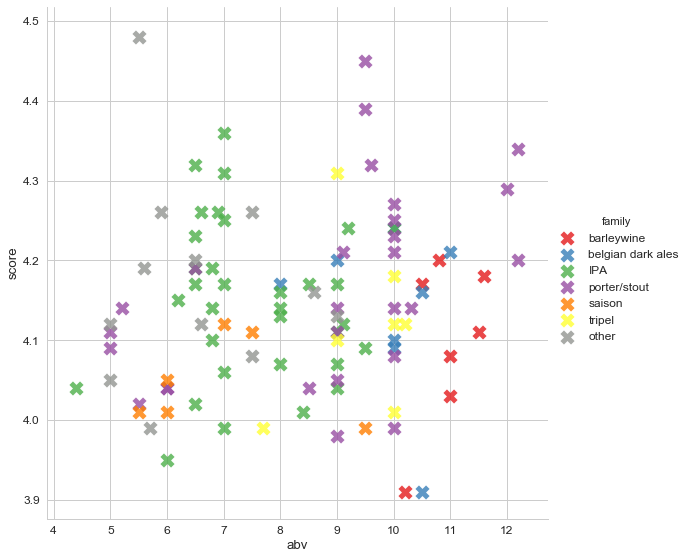

In [12]:
sns.lmplot(x='abv', y='score', hue='family', data=df, fit_reg=False, markers='X', size=8, scatter_kws={'alpha':0.8, 's':200});

That's a bit better!  While we've lost some specificity in beer styles by binning them, we can more easily make a few generalizations about these three variables:
- Most of the high scoring beers are porters, stouts, or IPAs
- Barleywines tend to have very high ABV, all above 10%
- IPAs mostly fall within the same range of 6% to 9% ABV
- Saison style beers fall in a fairly tight range regarding score
- Some of the highest and lowest ABVs are in the porter/stout family, showing great variation in this family
- The highest scoring beer has a relatively low ABV, which could mean that reviewers aren't looking to get crunked when looking for a good beer

### stripplot
A scatterplot where one of the variables is categorical data can be drawn using `stripplot`.  Let's take a look at *family* and *abv* to see how it correlates with the generalizations we made earlier:

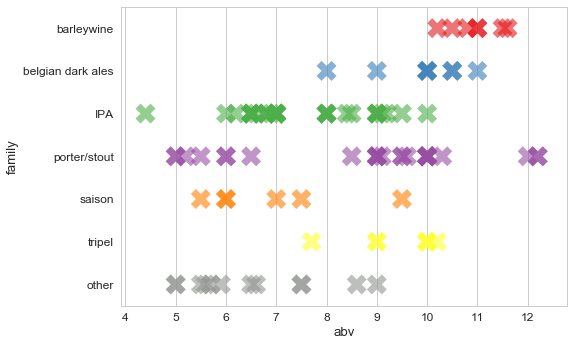

In [13]:
sns.stripplot(x="abv", y="family", data=df, marker='X', alpha=0.6, size=20);

Observations?
- Barleywines have a fairly tight ABV range between 10% and 12%
- The Belgian ales (Belgian dark ales and tripels) also have a relatively narrow ABV range, which could mean these styles are fairly strict in their definition
- IPAs, porters and stouts have a wide range of ABV, which could mean brewers have a wide latitude in creating these beers

### countplot
The familiar bar graph can be drawn with the number of occurrences for categorical data using `countplot()`.  This is a graphical way of showing the *pandas* `value_counts()` method.

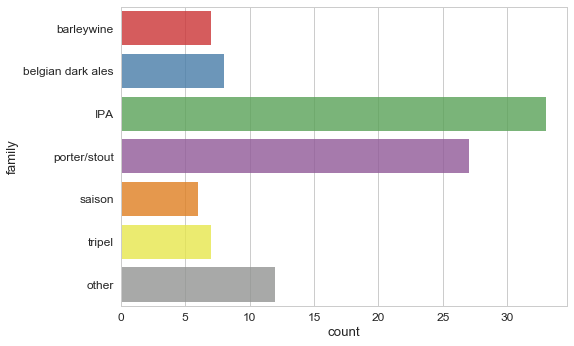

In [14]:
sns.countplot(y='family', data=df, alpha=0.8);

The Top 100 list is heavily represented by IPAs, porters, and stouts.  (We could have also easily drawn this conclusion by walking into any fine craft brewery or gastrobar.)

A question sure to lead to passionate debate (and possibly fisticuffs) is **which province make the best beer**?

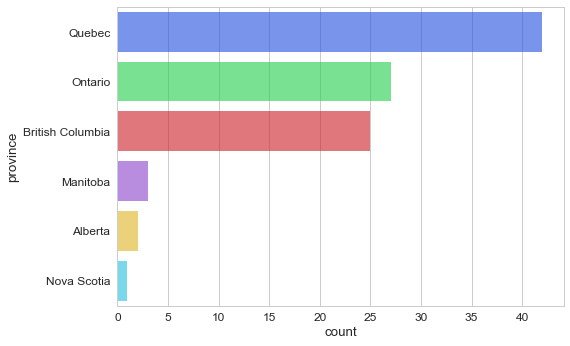

In [15]:
sns.countplot(y='province', data=df, palette='bright', order=df.province.value_counts().index, alpha=0.6);

I'll let the graph do the talking.

Another equally contentious topic: **who is the best brewery in Canada**?

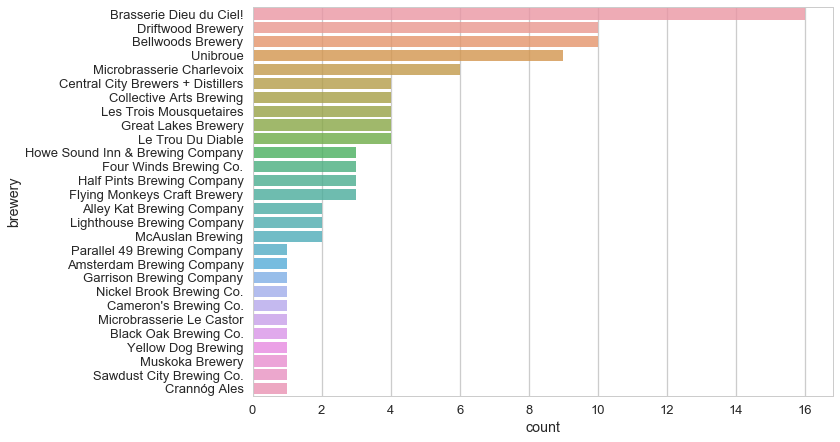

In [16]:
with sns.plotting_context("talk"):
    sns.countplot(y='brewery', data=df, order=df.brewery.value_counts().index, alpha=0.8);

# Conclusion
I hope you enjoyed this overview of **data exploration** using *seaborn*.  Looking at your data graphically is an important part of understanding it, and invaluable when communicating your data with others.  We will show off some of *seaborn's* more advanced methods in the future.  Cheers!

> Have a question about this topic, or a suggestion for a future topic?  Please, leave a comment below!
{:.blockquote}

### Resources
- Introduction to [Seaborn](https://seaborn.pydata.org/introduction.html)
- Overview of *pandas* [categorical data](http://pandas.pydata.org/pandas-docs/stable/categorical.html)